# MICROSOFT MOVIE ANALYSIS
* Student name: LISA MUKAMI MAINA
* Student pace: Part time 

## Business Problem
Microsoft aims to establish a new movie studio. However, lacking experience in the film industry, they require an analysis of the top-performing film genres at the box office. The goal of this analysis is to extract meaningful insights that can guide decision-making for the head of Microsoft's movie studio, helping them determine the most promising film genres to invest in.

## Data Understanding
Data for this analyis was pulled from:

<span style="background-color: #d3d3d3; padding: 3px;">'imdb.title.basics.csv.gz'</span>  
* **Source**: The dataset comes from IMDB Website  
* **Contents**: Data about movie's primary title, original title, start year, runtime minutes and genres
* **Format**: CSV data

<span style="background-color: #d3d3d3; padding: 3px;">'imdb.title.ratings.csv.gz'</span>  
* **Source**: The dataset comes from IMDB Website  
* **Contents**: Data about average rating and number of votes
* **Format**: CSV data

<span style="background-color: #d3d3d3; padding: 3px;">'bom.movie_gross.csv.gz'</span>  
* **Source**: The dataset comes from Box Office Mojo Website  
* **Contents**: Data about the movie title, production studio, gross domestic income, gross foreign domestic income and the year
* **Format**: CSV data

<span style="background-color: #d3d3d3; padding: 3px;">'tn.movie_budgets.csv.gz'</span>  
* **Source**: The dataset comes from The Numbers Website  
* **Contents**: Data about release date, movie title, production cost, gross domestic income and gross worldwide income 
* **Format**: CSV data


In [443]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## IMDB Genre Data

In [444]:
#Define the file path of the data
file_path_tbasics = 'zippedData/imdb.title.basics.csv.gz'

#Open the file and create a dataframe
tbasics_df = pd.read_csv(file_path_tbasics)
tbasics_df.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [445]:
#Obtain the summary statistics of the data
tbasics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [446]:
"""
The data types seem to line up with what we expect. The columns
containing strings are type object, whereas the column containing
decimal numbers (runtime_minutes) is type float64 and the column
containing whole number (start_year) is type int64

There are missing/NaN values in the original title,runtime_minutes
and genres columns

"""

'\nThe data types seem to line up with what we expect. The columns\ncontaining strings are type object, whereas the column containing\ndecimal numbers (runtime_minutes) is type float64 and the column\ncontaining whole number (start_year) is type int64\n\nThere are missing/NaN values in the original title,runtime_minutes\nand genres columns\n\n'

In [447]:
#Obtain a count of the missing values 
tbasics_df.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [448]:
"""
There are 21 missing values in the original_title column,
31739 missing values in the runtime_minutes column and
5408 missing values in the genres column

"""

'\nThere are 21 missing values in the original_title column,\n31739 missing values in the runtime_minutes column and\n5408 missing values in the genres column\n\n'

In [449]:
#Check for duplicates
tbasics_duplicates=tbasics_df[tbasics_df.duplicated()] 
print(len(tbasics_duplicates)) 

0


In [450]:
"""
There are no duplicates

"""

'\nThere are no duplicates\n\n'

In [451]:
#Check for extraneous/placeholder values
for col in tbasics_df.columns:
    print(col, '\n', tbasics_df[col].value_counts(normalize=True).head(), '\n\n')

tconst 
 tt8443810    0.000007
tt4282670    0.000007
tt1521002    0.000007
tt1701219    0.000007
tt7678218    0.000007
Name: tconst, dtype: float64 


primary_title 
 Home          0.000164
The Return    0.000137
Broken        0.000137
Homecoming    0.000109
Alone         0.000109
Name: primary_title, dtype: float64 


original_title 
 Broken        0.000130
Home          0.000123
The Return    0.000116
Freedom       0.000089
Alone         0.000089
Name: original_title, dtype: float64 


start_year 
 2017    0.119772
2016    0.118185
2018    0.115290
2015    0.111144
2014    0.106669
Name: start_year, dtype: float64 


runtime_minutes 
 90.0     0.062331
80.0     0.030820
85.0     0.025480
100.0    0.023268
95.0     0.022280
Name: runtime_minutes, dtype: float64 


genres 
 Documentary     0.228691
Drama           0.152669
Comedy          0.065207
Horror          0.031065
Comedy,Drama    0.025004
Name: genres, dtype: float64 




In [452]:
"""
There no placeholder values in the data

"""

'\nThere no placeholder values in the data\n\n'

## IMDB Data Preparation
To obtain the frequency distribution per genre, the relevant column is the <span style="background-color: #d3d3d3; padding: 3px;">'genres'</span> column. However there are 5408 missing values in the <span style="background-color: #d3d3d3; padding: 3px;">'genres'</span> column. Therefore, this missing values need to be handled.

In [453]:
"""
Drop all of the rows where the genre is missing.
With this option, we reduce the possibility 
of changing the meaningfulness of the data.

"""

'\nDrop all of the rows where the genre is missing.\nWith this option, we reduce the possibility \nof changing the meaningfulness of the data.\n\n'

In [454]:
#Handling the missing values by dropping the rows containing the missing genre values
tbasics_df.dropna(subset=['genres'], inplace=True)

In [455]:
#Confirm if there are any missing values
tbasics_df['genres'].isna().sum()

0

To obtain frequency distribution of the genres;

In [456]:
#Obtain the number of films produced per genre
genre_counts = tbasics_df['genres'].value_counts()
genre_counts

Documentary                    32185
Drama                          21486
Comedy                          9177
Horror                          4372
Comedy,Drama                    3519
                               ...  
Animation,Family,Sport             1
Action,Family,Western              1
Biography,Family,News              1
Animation,Biography,Fantasy        1
Family,Fantasy,Western             1
Name: genres, Length: 1085, dtype: int64

In [457]:
#Obtain the top 20 genres
genre_counts.head(20)

Documentary                      32185
Drama                            21486
Comedy                            9177
Horror                            4372
Comedy,Drama                      3519
Thriller                          3046
Action                            2219
Biography,Documentary             2115
Drama,Romance                     2079
Comedy,Drama,Romance              1558
Documentary,Drama                 1554
Comedy,Romance                    1507
Romance                           1454
Documentary,Music                 1365
Drama,Thriller                    1335
Documentary,History               1289
Horror,Thriller                   1253
Biography,Documentary,History     1230
Biography,Documentary,Drama       1028
Family                             939
Name: genres, dtype: int64

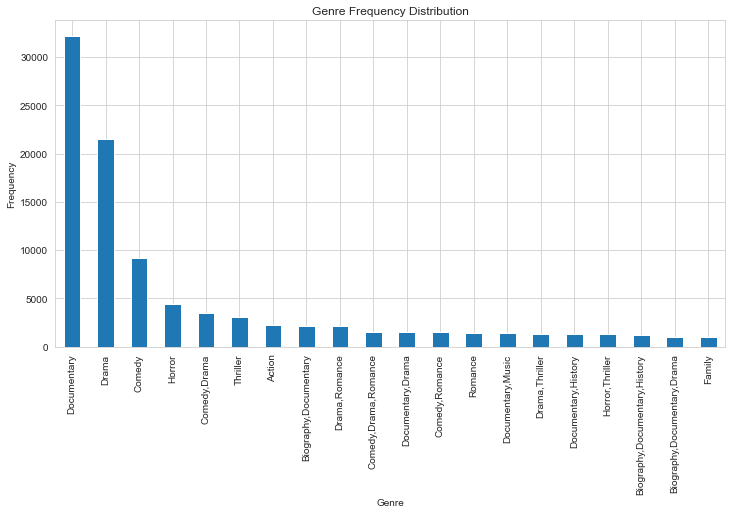

In [458]:
#Create a plot to visualize your results
genre_counts.head(20).plot(kind='bar', figsize=(12,6))
plt.title("Genre Frequency Distribution")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.show()

## IMDB Ratings Data

In [459]:
#Define a file path for your data
file_path_ratings = 'zippedData/imdb.title.ratings.csv.gz'

#Open the data and creat a dataframe
ratings_df = pd.read_csv(file_path_ratings)
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [460]:
#Obtain the summary statistics
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [461]:
"""
The data types seem to line up with what we expect. The columns
containing strings are type object, whereas the column containing
decimal numbers (averagerating) is type float64 and the column
containing whole number (numvotes) is type int64

There are no missing/NaN values

"""

'\nThe data types seem to line up with what we expect. The columns\ncontaining strings are type object, whereas the column containing\ndecimal numbers (averagerating) is type float64 and the column\ncontaining whole number (numvotes) is type int64\n\nThere are no missing/NaN values\n\n'

In [462]:
#Check for duplicates
ratings_duplicates = ratings_df[ratings_df.duplicated()] 
print(len(ratings_duplicates)) 

0


In [463]:
"""
There are no duplicate rows

"""

'\nThere are no duplicate rows\n\n'

In [464]:
#Check for extraneous/placeholder values
for col in ratings_df.columns:
    print(col, '\n', ratings_df[col].value_counts(normalize=True).head(), '\n\n') 
    

tconst 
 tt2448866    0.000014
tt5633600    0.000014
tt5336548    0.000014
tt3533592    0.000014
tt3431016    0.000014
Name: tconst, dtype: float64 


averagerating 
 7.0    0.030627
6.6    0.030478
7.2    0.030451
6.8    0.030316
6.5    0.030072
Name: averagerating, dtype: float64 


numvotes 
 6    0.038927
5    0.036544
7    0.033525
8    0.029341
9    0.026118
Name: numvotes, dtype: float64 




In [465]:
"""
There are no placeholder values

"""

'\nThere are no placeholder values\n\n'

## Data Aggregation
We need to find out the average rating per genre and the number of votes per genre. To do this, we need information about the genres which is contained in <span style="background-color: #d3d3d3; padding: 3px;">tbasics_df</span>. 

Both dataframes have a shared key <span style="background-color: #d3d3d3; padding: 3px;">'tconst'</span>.

We can therefore merge the dataframes-<span style="background-color: #d3d3d3; padding: 3px;">tbasics_df</span> and <span style="background-color: #d3d3d3; padding: 3px;">ratings_df</span> by their shared key 

In [466]:
merged_df = pd.merge(tbasics_df, ratings_df, on='tconst', how='inner')
merged_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73047,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73048,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73049,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73050,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8


In [467]:
#Obtain summary statistics of the new dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73051
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73052 non-null  float64
 7   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


In [468]:
"""
The data types seem to line up with what we expect. The columns
containing strings are type object, whereas the column containing
decimal numbers (runtime_minutes, averagerating) is type float64 
and the columns containing whole number (start_year, numvotes) is 
type int64

There are no missing/NaN values.

"""

'\nThe data types seem to line up with what we expect. The columns\ncontaining strings are type object, whereas the column containing\ndecimal numbers (runtime_minutes, averagerating) is type float64 \nand the columns containing whole number (start_year, numvotes) is \ntype int64\n\nThere are no missing/NaN values.\n\n'

In [469]:
#Check for duplicates
merged_duplicates = merged_df[merged_df.duplicated()] 
print(len(merged_duplicates)) 

0


In [470]:
"""
There are no duplicated rows.

"""

'\nThere are no duplicated rows.\n\n'

In [471]:
#Check for extraneous/placeholder values
for col in merged_df.columns:
    print(col, '\n', merged_df[col].value_counts(normalize=True).head(), '\n\n')     

tconst 
 tt4986754    0.000014
tt4734108    0.000014
tt3553354    0.000014
tt3270108    0.000014
tt1412441    0.000014
Name: tconst, dtype: float64 


primary_title 
 The Return    0.000151
Broken        0.000137
Homecoming    0.000123
Together      0.000123
Lucky         0.000123
Name: primary_title, dtype: float64 


original_title 
 Lucky         0.000123
Broken        0.000123
Delirium      0.000110
The Gift      0.000110
The Return    0.000110
Name: original_title, dtype: float64 


start_year 
 2017    0.118245
2016    0.117902
2015    0.115055
2014    0.113193
2013    0.108211
Name: start_year, dtype: float64 


runtime_minutes 
 90.0     0.071789
80.0     0.032593
85.0     0.031163
100.0    0.029732
95.0     0.029200
Name: runtime_minutes, dtype: float64 


genres 
 Drama           0.158955
Documentary     0.141173
Comedy          0.076836
Horror          0.036850
Comedy,Drama    0.035824
Name: genres, dtype: float64 


averagerating 
 7.0    0.030513
6.6    0.030403
7.2    0.0

In [472]:
"""
There are no placeholder values.

"""

'\nThere are no placeholder values.\n\n'

6.330930022449761
6.5
1.474699374814549


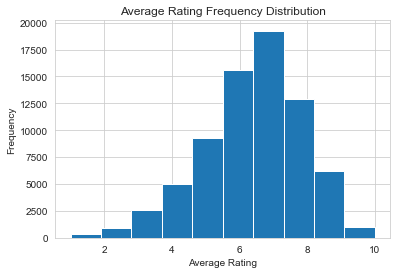

In [473]:
#Obtain the descriptive statistics of the average rating
print(merged_df['averagerating'].mean())
print(merged_df['averagerating'].median())
print(merged_df['averagerating'].std())

#Create a plot to visualize the frequency distribution of the average ratings
merged_df['averagerating'].plot(kind='hist')
plt.title("Average Rating Frequency Distribution")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.show()

3562.1726304550184
50.0
30458.037566443305


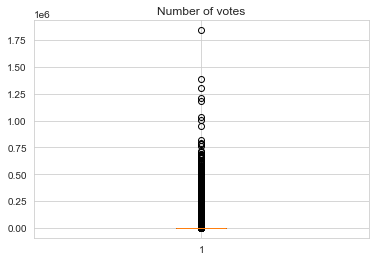

In [474]:
print(merged_df['numvotes'].mean())
print(merged_df['numvotes'].median())
print(merged_df['numvotes'].std())

data = merged_df['numvotes']
plt.boxplot(data=data, x=data.values)

plt.title("Number of votes")
plt.show()

## Data Preparation
To find out the average rating per genre and hence obtain information on the highly rated genres, we will need to group our data from the <span style="background-color: #d3d3d3; padding: 3px;">'genres'</span> column by average rating.

However from our data, we see that we have varying number of votes for various genres and this might have a significant influence on the average rating. 

To handle this, we shall calculate the weighted average rating per genre to ensure a balanced aggregation that takes into account the varying number of votes


In [475]:
#Obtain the weighted average rating per genre
weighted_average_rating = merged_df.groupby('genres').apply(lambda x: (x['averagerating'] * x['numvotes']).sum() / x['numvotes'].sum()).sort_values(ascending=False)
weighted_average_rating

genres
Comedy,Documentary,Fantasy    9.400000
Documentary,Family,Musical    9.300000
History,Sport                 9.200000
Game-Show                     9.000000
Music,Mystery                 9.000000
                                ...   
Adventure,Crime,Romance       2.300000
History,Sci-Fi,Thriller       2.300000
Crime,Mystery                 2.057394
Adult,Horror                  2.000000
Comedy,Musical,Sport          1.400000
Length: 923, dtype: float64

In [476]:
#Obtain the top 20 genre by weighted average rating
weighted_average_rating.head(20)

genres
Comedy,Documentary,Fantasy     9.400000
Documentary,Family,Musical     9.300000
History,Sport                  9.200000
Game-Show                      9.000000
Music,Mystery                  9.000000
Documentary,News,Reality-TV    8.800000
Documentary,News,Sport         8.800000
Comedy,Drama,Reality-TV        8.800000
Drama,Short                    8.800000
Drama,Fantasy,War              8.800000
Documentary,Music,War          8.709822
Action,Adventure,Musical       8.700000
Adventure,Drama,War            8.636549
Documentary,Family,Romance     8.574138
Biography,History,Music        8.500000
Adventure,Crime                8.500000
Comedy,Documentary,Sci-Fi      8.500000
Action,Documentary,Family      8.438554
Mystery,News,Thriller          8.400000
Music,Musical,Romance          8.400000
dtype: float64

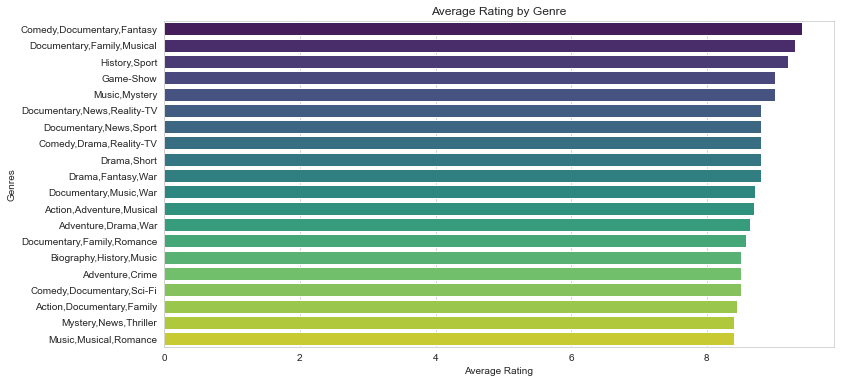

In [477]:
#Visualize your results
plt.figure(figsize=(12, 6))

data=weighted_average_rating.head(20)

sns.barplot(data=weighted_average_rating.head(20).reset_index(), x=data.values, y=data.index, palette="viridis")

plt.xlabel("Average Rating")
plt.ylabel("Genres")
plt.title("Average Rating by Genre")
plt.show()

Find out the total number of votes per genre

In [478]:
votes_per_genre = merged_df.groupby('genres')['numvotes'].sum().sort_values(ascending=False)
votes_per_genre

genres
Action,Adventure,Sci-Fi       23023248
Action,Adventure,Fantasy       9658883
Adventure,Animation,Comedy     8687435
Drama                          8395521
Comedy,Drama,Romance           7665463
                                ...   
Crime,Western                        5
Horror,Musical,Romance               5
Comedy,Documentary,Fantasy           5
Family,War                           5
History,Sport                        5
Name: numvotes, Length: 923, dtype: int64

In [479]:
#Obtain the top 20 genres by number of votes
votes_per_genre.head(20)

genres
Action,Adventure,Sci-Fi       23023248
Action,Adventure,Fantasy       9658883
Adventure,Animation,Comedy     8687435
Drama                          8395521
Comedy,Drama,Romance           7665463
Action,Adventure,Comedy        7256686
Comedy                         6832037
Comedy,Drama                   6462839
Action,Crime,Drama             5563553
Drama,Romance                  5542760
Action,Crime,Thriller          4940335
Comedy,Romance                 4752398
Action,Comedy,Crime            4686559
Action,Adventure,Drama         4485443
Action,Thriller                4284464
Horror,Mystery,Thriller        3902882
Drama,Thriller                 3879354
Action,Adventure,Thriller      3748240
Action,Adventure,Animation     3570543
Biography,Drama,History        3502843
Name: numvotes, dtype: int64

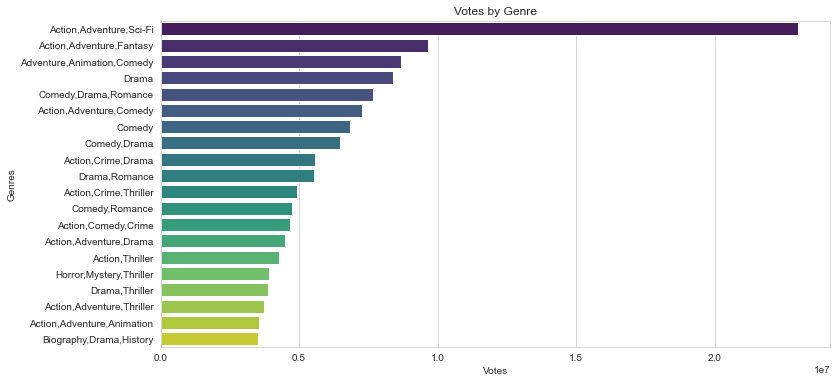

In [480]:
#Create a plot to visualize your results
plt.figure(figsize=(12, 6))

data=votes_per_genre.head(20) 

sns.barplot(data=votes_per_genre.head(20).reset_index(), x=data.values, y=data.index, palette="viridis")

plt.xlabel("Votes")
plt.ylabel("Genres")
plt.title("Votes by Genre")

plt.show()

## Box Office Mojo Data

In [481]:
#Define the file path
file_path = "zippedData/bom.movie_gross.csv.gz"

#Open file and load data into pandas
bom_df = pd.read_csv(file_path)
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [482]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [483]:
"""
Four of the data types seem to line up with what we expect. 
The columns containing strings are type object, whereas the
column containing decimal numbers (domestic_gross) is type 
float64 and the columns containing whole number (year) is 
type int64. The data type of the foreign_gross column does
not line up with what we expect. Data type of foreign_gross
will need to be changed

There are missing/NaN values on the studio, domestic_gross
and foreign_gross columns. These missing values will need
to be handled

"""

'\nFour of the data types seem to line up with what we expect. \nThe columns containing strings are type object, whereas the\ncolumn containing decimal numbers (domestic_gross) is type \nfloat64 and the columns containing whole number (year) is \ntype int64. The data type of the foreign_gross column does\nnot line up with what we expect. Data type of foreign_gross\nwill need to be changed\n\nThere are missing/NaN values on the studio, domestic_gross\nand foreign_gross columns. These missing values will need\nto be handled\n\n'

Change to datatype of <span style="background-color: #d3d3d3; padding: 3px;">'foreign_gross</span> to <span style="background-color: #d3d3d3; padding: 3px;">float</span>

In [484]:
bom_df['foreign_gross'] = bom_df['foreign_gross'].str.replace(',', '').astype(float)

Confirm whether data type has changed

In [485]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


Obtain the sum of the missing values per column

In [486]:
bom_df.isna().sum() 

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [487]:
"""
There are 5 missing values from studio column,
28 from domestic gross and 1350 from foreign_gross

"""

'\nThere are 5 missing values from studio column,\n28 from domestic gross and 1350 from foreign_gross\n\n'

In [488]:
#Check for duplicates
duplicates=bom_df[bom_df.duplicated()] 
print(len(duplicates)) 

0


In [489]:
"""
There are no duplicated rows

"""

'\nThere are no duplicated rows\n\n'

In [490]:
#Check for extraneous/placeholder values
for col in bom_df.columns:
    print(col, '\n', bom_df[col].value_counts(normalize=True).head(), '\n\n')

title 
 Bluebeard                     0.000590
Saala Khadoos                 0.000295
Exit Through the Gift Shop    0.000295
Coriolanus                    0.000295
Singh is Bling                0.000295
Name: title, dtype: float64 


studio 
 IFC      0.049083
Uni.     0.043465
WB       0.041396
Magn.    0.040213
Fox      0.040213
Name: studio, dtype: float64 


domestic_gross 
 1100000.0    0.009527
1000000.0    0.008931
1300000.0    0.008931
1200000.0    0.007443
1400000.0    0.006847
Name: domestic_gross, dtype: float64 


foreign_gross 
 1200000.0    0.011291
1100000.0    0.006873
1900000.0    0.005891
4200000.0    0.005891
2500000.0    0.005400
Name: foreign_gross, dtype: float64 


year 
 2015    0.132861
2016    0.128727
2012    0.118099
2011    0.117803
2014    0.116622
Name: year, dtype: float64 




In [491]:
"""
There are no placeholder values

"""

'\nThere are no placeholder values\n\n'

## Data Preparation
Handle missing values from the <span style="background-color: #d3d3d3; padding: 3px;">'domestic_gross'</span> and <span style="background-color: #d3d3d3; padding: 3px;">'foreign_gross'</span> columns


1. Plot a histogram to understand the distribution of the existing values

28745845.06698422
1400000.0
66982498.23736456


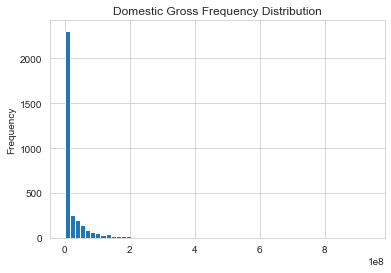

In [492]:
print(bom_df['domestic_gross'].mean())
print(bom_df['domestic_gross'].median())
print(bom_df['domestic_gross'].std())

bom_df['domestic_gross'].plot(kind='hist', bins=60)
plt.title("Domestic Gross Frequency Distribution")
plt.show()

74872810.15046637
18700000.0
137410600.84150562


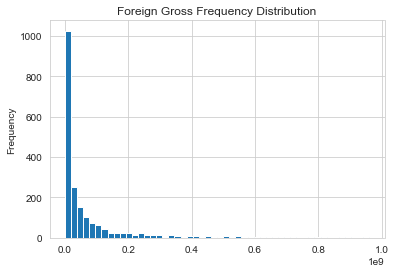

In [493]:
print(bom_df['foreign_gross'].mean())
print(bom_df['foreign_gross'].median())
print(bom_df['foreign_gross'].std())

bom_df['foreign_gross'].plot(kind='hist', bins=50)
plt.title("Foreign Gross Frequency Distribution")
plt.show()

In [494]:
"""
Both histograms show data is skewed
and contain outliers therefore not
normally distributed.Replacing the 
missing values with the respective
median values is the appropriate
choice since median is less sensitive
to outliers

"""

'\nBoth histograms show data is skewed\nand contain outliers therefore not\nnormally distributed.Replacing the \nmissing values with the respective\nmedian values is the appropriate\nchoice since median is less sensitive\nto outliers\n\n'

2. Replace missing values with the respective median

In [495]:
domestic_gross_median = bom_df['domestic_gross'].median()
bom_df['domestic_gross'].fillna(domestic_gross_median, inplace=True)

foreign_gross_median = bom_df['foreign_gross'].median()
bom_df['foreign_gross'].fillna(foreign_gross_median, inplace=True)

In [496]:
#Check the summary statistics after imputing missing values
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [497]:
"""
There are no missing values in the
foreign gross and domestic gross 
columns

"""

'\nThere are no missing values in the\nforeign gross and domestic gross \ncolumns\n\n'

Group years by their domestic and foreign gross to analyze the industry's performance over the years

In [498]:
yearly_data = bom_df.groupby('year')[['domestic_gross', 'foreign_gross']].sum()
yearly_data

,domestic_gross,foreign_gross
year,,
2010,1.016393e+10,1.463606e+10
2011,1.006696e+10,1.765319e+10
2012,1.088641e+10,1.984289e+10
2013,1.079933e+10,1.932389e+10
2014,1.034334e+10,1.990787e+10
2015,1.105281e+10,2.004726e+10
2016,1.125785e+10,2.362574e+10
2017,1.093467e+10,2.272503e+10
2018,1.109121e+10,1.999899e+10


Convert values from scientic notation to numeric 

In [499]:
def format_as_currency(x):
    return '${:,.2f}'.format(x)
yearly_data_currency = yearly_data.applymap(format_as_currency)

In [500]:
yearly_data_currency

,domestic_gross,foreign_gross
year,,
2010,"$10,163,926,399.00","$14,636,057,898.00"
2011,"$10,066,958,200.00","$17,653,185,996.00"
2012,"$10,886,405,997.00","$19,842,887,097.00"
2013,"$10,799,329,897.00","$19,323,894,298.00"
2014,"$10,343,338,499.00","$19,907,867,698.00"
2015,"$11,052,805,394.00","$20,047,256,413.00"
2016,"$11,257,853,097.00","$23,625,741,300.00"
2017,"$10,934,666,198.00","$22,725,033,007.00"
2018,"$11,091,209,899.00","$19,998,990,569.50"


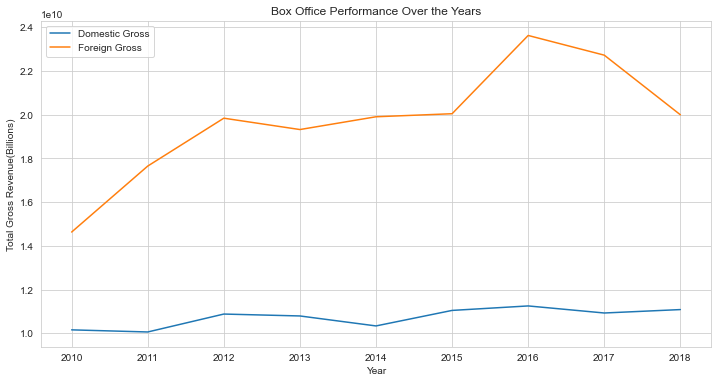

In [501]:
# Create a line chart to visualize the results
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot the line chart for domestic gross revenue
sns.lineplot(data=yearly_data, x='year', y='domestic_gross', label='Domestic Gross')

# Plot the line chart for foreign gross revenue
sns.lineplot(data=yearly_data, x='year', y='foreign_gross', label='Foreign Gross')

plt.title('Box Office Performance Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Gross Revenue(Billions)')
plt.legend()
plt.show()

In [502]:
yearly_data_mean = bom_df.groupby('year')[['domestic_gross', 'foreign_gross']].mean()
yearly_data_mean

,domestic_gross,foreign_gross
year,,
2010,3.098758e+07,4.462213e+07
2011,2.523047e+07,4.424357e+07
2012,2.721601e+07,4.960722e+07
2013,3.085523e+07,5.521113e+07
2014,2.618567e+07,5.039967e+07
2015,2.456179e+07,4.454946e+07
2016,2.582076e+07,5.418748e+07
2017,3.406438e+07,7.079450e+07
2018,3.601042e+07,6.493179e+07


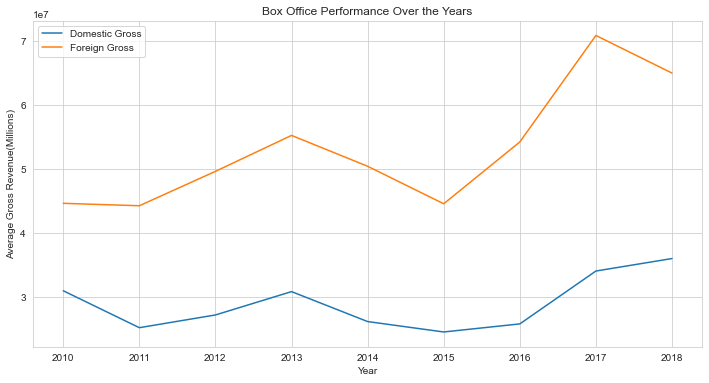

In [503]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot the line chart for domestic gross revenue
sns.lineplot(data=yearly_data_mean, x='year', y='domestic_gross', label='Domestic Gross')

# Plot the line chart for foreign gross revenue
sns.lineplot(data=yearly_data_mean, x='year', y='foreign_gross', label='Foreign Gross')

plt.title('Box Office Performance Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Gross Revenue(Millions)')
plt.legend()
plt.show()

## The Numbers Data

In [504]:
#Define file path
file_path_tn = 'zippedData/tn.movie_budgets.csv.gz'

#Open file and load data into a dataframe
tn_df = pd.read_csv(file_path_tn)
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [505]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [506]:
"""
Only two of the data types(id dtype int 64
and movie and release date as dtype object) 
seem to line up with what we expect. The rest 
do not line up with our expectation. Columns 
containing whole numbers are dtype object. 
These columns need to be converted to the
appropriate data type.

There are no missing/NaN values.

"""

'\nOnly two of the data types(id dtype int 64\nand movie and release date as dtype object) \nseem to line up with what we expect. The rest \ndo not line up with our expectation. Columns \ncontaining whole numbers are dtype object. \nThese columns need to be converted to the\nappropriate data type.\n\nThere are no missing/NaN values.\n\n'

Convert to appropriate data types

In [507]:
tn_df['production_budget'] = tn_df['production_budget'].str.replace('$', '').str.replace(',','').astype(float)

In [508]:
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace('$', '').str.replace(',','').astype(float)

In [509]:
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace('$', '').str.replace(',','').astype(float)

Check the summary statistics again

In [510]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [511]:
"""
The data types now line up with
what we expect

"""

'\nThe data types now line up with\nwhat we expect\n\n'

In [512]:
#Check for duplicates
tn_df_duplicates = tn_df[tn_df.duplicated()]
print(len(tn_df_duplicates))

0


In [513]:
"""
There are no duplicated rows

"""

'\nThere are no duplicated rows\n\n'

In [514]:
#Check for extraneous/placeholder values
for col in tn_df.columns:
    print(col, '\n', tn_df[col].value_counts(normalize=True).head(), '\n\n')

id 
 4     0.010031
53    0.010031
61    0.010031
65    0.010031
69    0.010031
Name: id, dtype: float64 


release_date 
 Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2009    0.002248
Name: release_date, dtype: float64 


movie 
 King Kong                0.000519
Halloween                0.000519
Home                     0.000519
Fantastic Four           0.000346
The Birth of a Nation    0.000346
Name: movie, dtype: float64 


production_budget 
 20000000.0    0.039952
10000000.0    0.036666
30000000.0    0.030612
15000000.0    0.029920
25000000.0    0.029575
Name: production_budget, dtype: float64 


domestic_gross 
 0.0           0.094777
8000000.0     0.001557
2000000.0     0.001211
7000000.0     0.001211
10000000.0    0.001038
Name: domestic_gross, dtype: float64 


worldwide_gross 
 0.0          0.063473
8000000.0    0.001557
7000000.0    0.001038
2000000.0    0.001038
9000000.0    0.000692
Name: worldwide_gross, dtyp

In [515]:
"""
There are no placeholder values

"""

'\nThere are no placeholder values\n\n'

## Data Preparation
We want to find out the seasonal box office performance. Since we only have release dates, we will need to convert them to seasons and find out the number of movies released by season.

In [516]:
#Convert to datetime object
tn_df['release_date'] = pd.to_datetime(tn_df['release_date'])

# Extract the month from the release date
tn_df['release_month'] = tn_df['release_date'].dt.month

# Define the seasons
seasons = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}

# Map the months to seasons
tn_df['season'] = tn_df['release_month'].map(seasons)
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,season
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,Winter
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,Spring
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,Summer
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,Spring
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,Winter


Create a new column <span style="background-color: #d3d3d3; padding: 3px;">'total_gross'</span> that is a sum of <span style="background-color: #d3d3d3; padding: 3px;">domestic_gross</span> and <span style="background-color: #d3d3d3; padding: 3px;">worldwide_gross</span> 

In [517]:
tn_df['total_gross'] = tn_df['domestic_gross'] + tn_df['worldwide_gross']
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,season,total_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,Winter,3.536853e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,Spring,1.286728e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,Summer,1.925247e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,Spring,1.862020e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,Winter,1.936903e+09


Group the seasons by the total gross 

In [518]:
seasonal_gross = tn_df.groupby('season')['total_gross'].sum()
seasonal_gross

season
Fall      1.710172e+11
Spring    1.888270e+11
Summer    2.347452e+11
Winter    1.765027e+11
Name: total_gross, dtype: float64

Convert values from scientific notation to numeric

In [519]:
def format_as_currency(x):
    return '${:,.2f}'.format(x)
seasonal_currency = seasonal_gross.apply(format_as_currency)
seasonal_currency

season
Fall      $171,017,219,386.00
Spring    $188,827,020,842.00
Summer    $234,745,152,275.00
Winter    $176,502,682,403.00
Name: total_gross, dtype: object

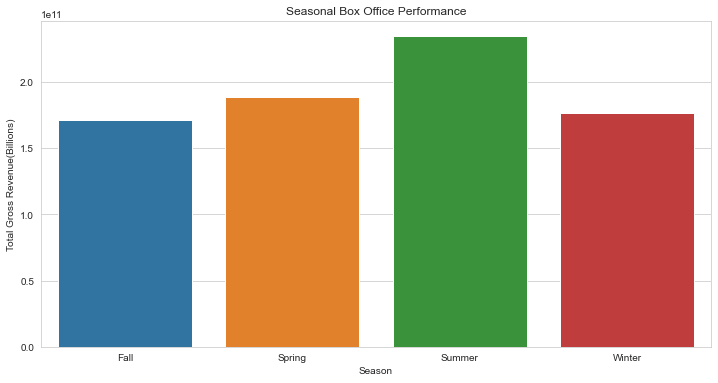

In [520]:
#Create a barplot to visualize the results
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.barplot(data=seasonal_gross.reset_index(), x=seasonal_gross.index, y=seasonal_gross.values)

plt.title('Seasonal Box Office Performance')
plt.xlabel('Season')
plt.ylabel('Total Gross Revenue(Billions)')
plt.show()

# Conclusion
Based on the analysis, the recommendations to be put forward:
* Prioritize development and production of high-quality documentary content. Documentary is the most prevalent genre with 32,185 films in the dataset. This indicates a substantial audience interest in real-life stories, historical events, and informative content.
* Consider creating fims that combine multiple genres. The top-rated genre combinations include "Comedy, Documentary, Fantasy" and "Documentary, Family, Musical. This approach can result in unique and appealing productions that resonate with a diverse audience. 
* Prioritize the production of Action-Adventure-Sci-Fi films. This genre has the highest number of votes, indicating a significant level of interest and engagement from the audience.

### Bonus
* Given the substantial increase in foreign gross revenue from 2010 to 2018, international markets play a significant role in a film's overall success. Therefore, the studio should consider tailoring their films to international audiences as well as investing in targeted international marketing, localization, and distribution strategies to further capitalize on the global audience and maximize revenue from foreign markets.
* Since the summer season generates the highest total gross earnings, the studio should strategically plan the release of their big-budget and highly-anticipated movies during the summer months when the box office tends to perform exceptionally well. This can maximize the studio's revenue potential and capitalize on the season's strong box office performance.

### Limitation
The data provided may not be an accurate representation of the current trends as the film industry keeps evolving